In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt

In [2]:
def train_and_evaluate(X_train, y_train, X_test,y_test):

    
    # Train logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, f1, recall, precision

In [3]:
# Initialize lists to store accuracy and F1 scores
accuracies = []
f1_scores = []
recalls = []
precisions = []

# Loop through each dataset
# write the datasets
flip_percentages = [0,0.1, 0.2, 0.3, 0.4, 0.5]

for percentage in flip_percentages:
    # Load the dataset
    df = pd.read_csv(f"/Users/A117870943/Documents/DT/Innovation/data/train/scaled/train_flipped_labels_{int(percentage*100)}.csv")
    test = pd.read_csv("/Users/A117870943/Documents/DT/Innovation/data/test/scaled/test_scaled.csv")
    #test.rename(columns={'label':'label_flip'},inplace=True}
    # Preprocess the data
    X_train = df.drop(columns=['label','label_flip'],axis=1)
    y_train = df['label_flip']
    
    X_test = test.drop(columns=['label'],axis=1)
    y_test = test['label']
    
    # Train and evaluate the model
    accuracy, f1, recall, precision = train_and_evaluate(X_train, y_train, X_test,y_test)
    
    # Store the results
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recalls.append(recall)
    precisions.append(precision)

In [4]:
accuracies

[0.6982, 0.6996, 0.6986, 0.6946, 0.6924, 0.6848]

In [5]:
f1_scores

[0.301065308012969,
 0.2750965250965251,
 0.2179553710430721,
 0.14165261382799327,
 0.07683073229291718,
 0.006305170239596469]

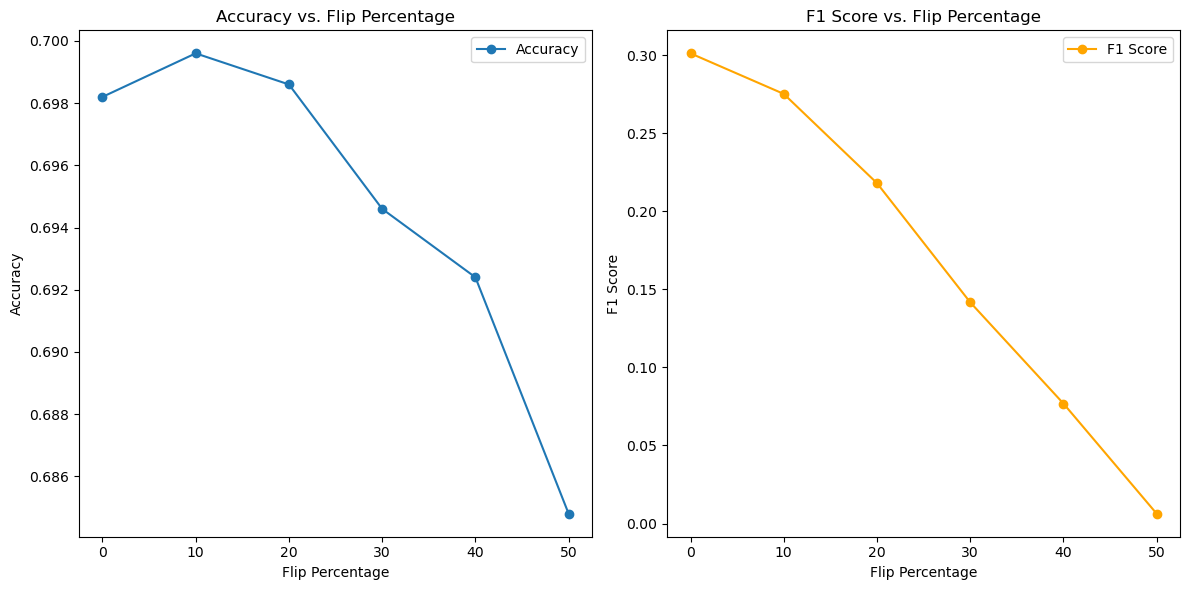

In [14]:
# Plot the accuracy and F1 scores
percentages = [0,10, 20, 30, 40, 50]
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(percentages, accuracies, marker='o', label='Accuracy')
plt.xlabel('Flip Percentage')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Flip Percentage')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(percentages, f1_scores, marker='o', label='F1 Score', color='orange')
plt.xlabel('Flip Percentage')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Flip Percentage')
plt.legend()

plt.tight_layout()
plt.show()

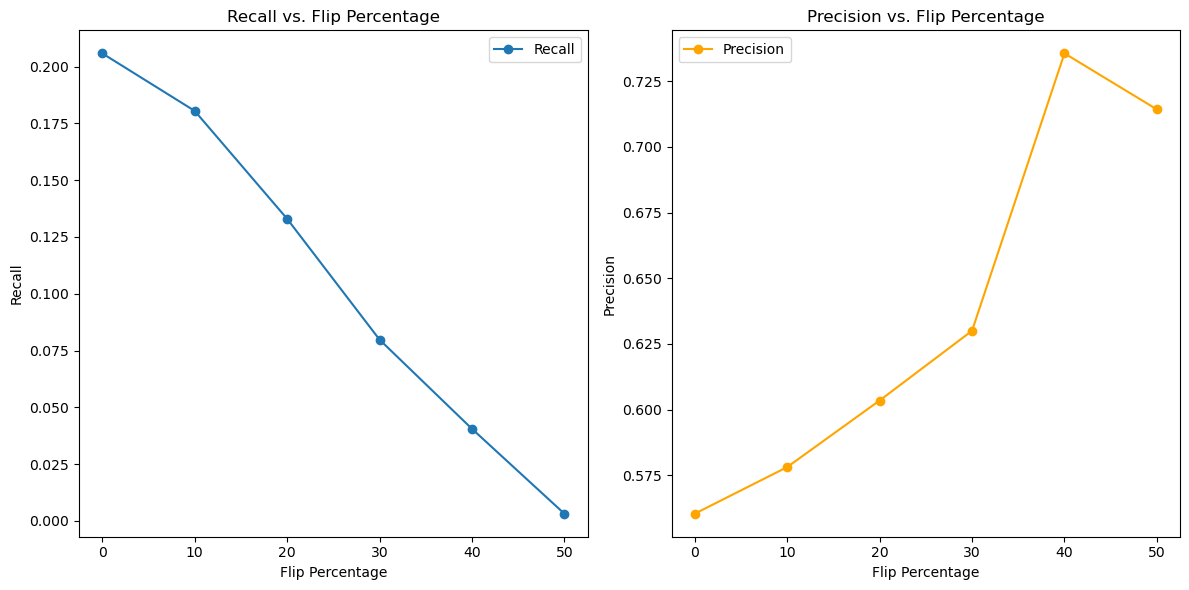

In [8]:
# Plot the accuracy and F1 scores
percentages = [0,10, 20, 30, 40, 50]
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(percentages, recalls, marker='o', label='Recall')
plt.xlabel('Flip Percentage')
plt.ylabel('Recall')
plt.title('Recall vs. Flip Percentage')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(percentages, precisions, marker='o', label='Precision', color='orange')
plt.xlabel('Flip Percentage')
plt.ylabel('Precision')
plt.title('Precision vs. Flip Percentage')
plt.legend()

plt.tight_layout()
plt.show()